In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import geopandas as gpd

### TODO: Create a geopandas frame with Region, Division, State, County, ZCTA rollups

## Resources

Understanding Geographic Identifiers (GEOIDs): https://www.census.gov/geo/reference/geoidentifiers.html

FP --> FIPS --> Federal Information Processing Standard

NS --> GNIS --> Geographic Names Information System

AFF --> American Fact Finder : https://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml

Census Regions and Divisions of the United States : https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf


## Data Files

In [4]:
us_file_root = 'http://www2.census.gov/geo/tiger/GENZ2017/shp/'

# shp files

us_nation_file = us_file_root + 'cb_2017_us_nation_5m.zip'
us_region_file = us_file_root + 'cb_2017_us_region_500k.zip'
us_division_file = us_file_root + 'cb_2017_us_division_500k.zip'
us_state_file = us_file_root + 'cb_2017_us_state_500k.zip'
us_county_file = us_file_root + 'cb_2017_us_county_500k.zip'
us_zcta_file = us_file_root + 'cb_2017_us_zcta510_500k.zip'

# zcta county crosswalk file

zcta_county_crosswalk_file = 'https://www2.census.gov/geo/docs/maps-data/data/rel/zcta_county_rel_10.txt'

## Geographic shape files

### Nation

In [5]:
us_nation = gpd.GeoDataFrame.from_file(us_nation_file)
us_nation

,AFFGEOID,GEOID,NAME,geometry
0,0100000US,US,United States,"(POLYGON ((-176.236246 51.825965, -176.217544 ..."


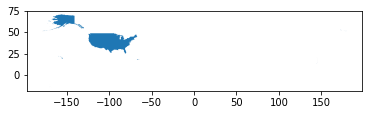

In [6]:
us_nation.plot();

### Regions

In [7]:
us_regions = gpd.GeoDataFrame.from_file(us_region_file)
us_regions

,REGIONCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,1,0200000US1,1,Northeast,68,419351809262,50265327809,"(POLYGON ((-68.658794 44.110212, -68.654169999..."
1,2,0200000US2,2,Midwest,68,1943880837294,184389713736,"(POLYGON ((-90.62498699999999 47.003962, -90.6..."
2,4,0200000US4,4,West,68,4535926557990,348853297818,"(POLYGON ((-171.177725 52.562435, -171.172734 ..."
3,3,0200000US3,3,South,68,2249495677637,134460600249,"(POLYGON ((-89.300534 29.382881, -89.299962999..."


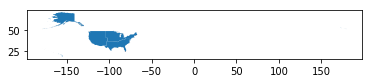

In [8]:
us_regions.plot();

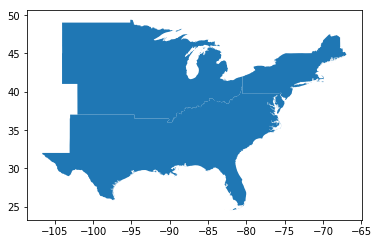

In [9]:
us_regions.query("NAME != 'West'").plot();

### Divisions

In [10]:
us_divisions = gpd.GeoDataFrame.from_file(us_division_file)
us_divisions

,DIVISIONCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,1,0300000US1,1,New England,69,162371615824,24077657991,"(POLYGON ((-69.38471699999999 43.909183, -69.3..."
1,2,0300000US2,2,Middle Atlantic,69,256980193438,26187669818,"(POLYGON ((-72.0368298202051 41.2498425393847,..."
2,3,0300000US3,3,East North Central,69,629168688124,151373544381,"(POLYGON ((-82.73570699999999 41.603361, -82.7..."
3,4,0300000US4,4,West North Central,69,1314712149170,33016169355,"(POLYGON ((-89.59205799999999 47.966683, -89.5..."
4,6,0300000US6,6,East South Central,69,461768796419,13266695205,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
5,7,0300000US7,7,West South Central,69,1100979283986,49100653265,"(POLYGON ((-88.8677 29.861551, -88.86565899999..."
6,8,0300000US8,8,Mountain,69,2216504897516,20112004302,"POLYGON ((-120.005743 39.22866399999999, -120...."
7,5,0300000US5,5,South Atlantic,69,686747597232,72093251779,"(POLYGON ((-80.923153 24.766678, -80.922203 24..."
8,9,0300000US9,9,Pacific,69,2319421660474,328741293516,"(POLYGON ((-158.744905 70.902424, -158.742409 ..."


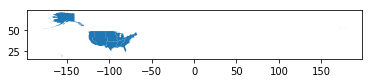

In [11]:
us_divisions.plot()

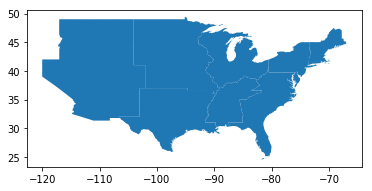

In [12]:
us_divisions.query("NAME != 'Pacific'").plot();

### States

In [13]:
us_states = gpd.GeoDataFrame.from_file(us_state_file)

#### STATEFP == GEOID
#### AFFGEOID == '0400000US' + GEOID
#### TODO: rename GEOID to STATEGEOID

In [14]:
us_states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,54,01779805,0400000US54,54,WV,West Virginia,00,62265662566,489840834,"POLYGON ((-82.6431981036679 38.1690897960737, ..."
1,17,01779784,0400000US17,17,IL,Illinois,00,143784114293,6211277447,"POLYGON ((-91.512974 40.181062, -91.511073 40...."
2,24,01714934,0400000US24,24,MD,Maryland,00,25150696145,6980371026,"(POLYGON ((-76.05015299999999 37.986905, -76.0..."
3,16,01779783,0400000US16,16,ID,Idaho,00,214048160737,2393355752,"POLYGON ((-117.242675 44.396548, -117.234835 4..."
4,50,01779802,0400000US50,50,VT,Vermont,00,23873457570,1031134839,"POLYGON ((-73.43773999999999 44.045006, -73.43..."


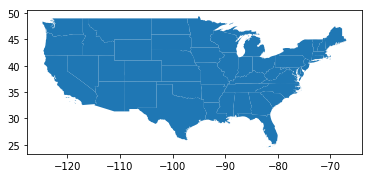

In [15]:
us_states.query("STUSPS not in ['DC', 'VI', 'PR', 'AS', 'GU', 'MP', 'AK', 'HI']").plot();

### Counties

In [16]:
us_counties = gpd.GeoDataFrame.from_file(us_county_file)

#### GEOID = STATEFP + COUNTYFP
#### AFFGEOID = '0500000US' + GEOID
#### TODO: rename GEOID to COUNTYGEOID

In [17]:
us_counties.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,01,005,00161528,0500000US01005,01005,Barbour,06,2292144656,50538698,"POLYGON ((-85.74803199999999 31.619181, -85.74..."
1,01,023,00161537,0500000US01023,01023,Choctaw,06,2365869837,19144469,"POLYGON ((-88.47322699999999 31.893856, -88.46..."
2,01,035,00161543,0500000US01035,01035,Conecuh,06,2201948618,6643480,"POLYGON ((-87.42720399999999 31.26436, -87.425..."
3,01,051,00161551,0500000US01051,01051,Elmore,06,1601762124,99965171,"POLYGON ((-86.41333499999999 32.750591, -86.37..."
4,01,065,00161558,0500000US01065,01065,Hale,06,1667907107,32423356,"POLYGON ((-87.870464 32.762442, -87.868184 32...."


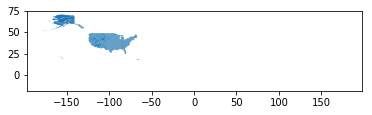

In [18]:
us_counties.plot();

### ZCTAs

In [19]:
us_zctas = gpd.GeoDataFrame.from_file(us_zcta_file)

In [20]:
us_zctas.head()

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,35442,8600000US35442,35442,610213891,10838694,"(POLYGON ((-88.252618 32.92675, -88.249724 32...."
1,85365,8600000US85365,85365,3545016067,9766486,"(POLYGON ((-114.684663 32.687389, -114.676063 ..."
2,71973,8600000US71973,71973,204670474,1264709,"POLYGON ((-94.46643176650841 34.330735, -94.46..."
3,95445,8600000US95445,95445,221559097,7363179,"POLYGON ((-123.643051 38.851233, -123.641401 3..."
4,06870,8600000US06870,06870,5945321,3841130,"POLYGON ((-73.58765810889219 41.0076522198727,..."


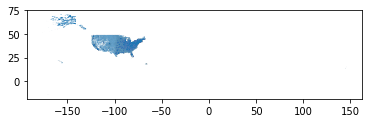

In [21]:
us_zctas.plot();

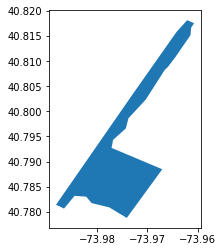

In [22]:
us_zctas.query("GEOID10 == '10024'").plot();

## Load ZCTA County Crosswalk

In [23]:
crosswalk_dtype_dict = {'ZCTA5': str, 
                        'STATE' : str,
                        'COUNTY' : str,
                        'GEOID' : str}

In [24]:
zcta_county_crosswalk = pd.read_csv(zcta_county_crosswalk_file,
                                    dtype = crosswalk_dtype_dict)

In [25]:
zcta_county_crosswalk.columns

Index(['ZCTA5', 'STATE', 'COUNTY', 'GEOID', 'POPPT', 'HUPT', 'AREAPT',
       'AREALANDPT', 'ZPOP', 'ZHU', 'ZAREA', 'ZAREALAND', 'COPOP', 'COHU',
       'COAREA', 'COAREALAND', 'ZPOPPCT', 'ZHUPCT', 'ZAREAPCT', 'ZAREALANDPCT',
       'COPOPPCT', 'COHUPCT', 'COAREAPCT', 'COAREALANDPCT'],
      dtype='object')

In [26]:
zcta_county_crosswalk.head()

,ZCTA5,STATE,COUNTY,GEOID,POPPT,HUPT,AREAPT,AREALANDPT,ZPOP,ZHU,...,COAREA,COAREALAND,ZPOPPCT,ZHUPCT,ZAREAPCT,ZAREALANDPCT,COPOPPCT,COHUPCT,COAREAPCT,COAREALANDPCT
0,00601,72,001,72001,18465,7695,165132671,164333375,18570,7744,...,173777444,172725651,99.43,99.37,98.61,98.60,94.77,94.71,95.03,95.14
1,00601,72,141,72141,105,49,2326414,2326414,18570,7744,...,298027589,294039825,0.57,0.63,1.39,1.40,0.32,0.35,0.78,0.79
2,00602,72,003,72003,41520,18073,83734431,79288158,41520,18073,...,117948080,79904246,100.00,100.00,100.00,100.00,98.95,98.99,70.99,99.23
3,00603,72,005,72005,54689,25653,82063867,81880442,54689,25653,...,195741178,94608641,100.00,100.00,100.00,100.00,89.73,90.23,41.92,86.55
4,00606,72,093,72093,6276,2740,94864349,94851862,6615,2877,...,94864349,94851862,94.88,95.24,86.56,86.56,100.00,100.00,100.00,100.00


## US Counties GeoDataFrame with Region and State columns

In [27]:
zcta_county_crosswalk.query("ZCTA5 == '10024'")

,ZCTA5,STATE,COUNTY,GEOID,POPPT,HUPT,AREAPT,AREALANDPT,ZPOP,ZHU,...,COAREA,COAREALAND,ZPOPPCT,ZHUPCT,ZAREAPCT,ZAREALANDPCT,COPOPPCT,COHUPCT,COAREAPCT,COAREALANDPCT
2812,10024,36,061,36061,59283,33952,2221831,2221831,59283,33952,...,86999364,59126033,100.0,100.0,100.0,100.0,3.74,4.01,2.55,3.76


In [28]:
us_states.query("STATEFP == '36'")

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
39,36,01779796,0400000US36,36,NY,New York,00,122048992746,19247151848,"(POLYGON ((-72.0368298202051 41.2498425393847,..."


In [29]:
us_counties.query("COUNTYFP == '061'")

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
63,16,061,00395622,0500000US16061,16061,Lewis,06,1240137223,2345525,"POLYGON ((-116.713818 46.308584, -116.712585 4..."
71,18,061,00451677,0500000US18061,18061,Harrison,06,1254889443,5193189,"POLYGON ((-86.32767699999999 38.182736, -86.32..."
325,05,061,00066872,0500000US05061,05061,Howard,06,1524380220,17475726,"POLYGON ((-94.254898 34.346195, -94.254668 34...."
491,39,061,01074043,0500000US39061,39061,Hamilton,06,1051353810,17350705,"POLYGON ((-84.82015899999999 39.227225, -84.82..."
567,42,061,01213672,0500000US42061,42061,Huntingdon,06,2265337403,37851955,"POLYGON ((-78.25670000000001 40.298734, -78.25..."
593,53,061,01529222,0500000US53061,53061,Snohomish,06,5404083801,282887163,"(POLYGON ((-122.33164 48.020556, -122.328343 4..."
817,51,061,01480120,0500000US51061,51061,Fauquier,06,1678273823,9687703,"POLYGON ((-78.13126699999999 38.867459, -78.13..."
846,28,061,00695754,0500000US28061,28061,Jasper,06,1751451429,3181592,"POLYGON ((-89.32269199999999 32.223472, -89.25..."
853,30,061,01720030,0500000US30061,30061,Mineral,06,3158799736,9897206,"POLYGON ((-115.759233 47.423471, -115.754792 4..."
980,48,061,01383816,0500000US48061,48061,Cameron,06,2307897628,998028553,(POLYGON ((-97.24312524456749 26.4115024651191...


In [30]:
us_counties.query("GEOID == '36103'")

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
3074,36,103,00974149,0500000US36103,36103,Suffolk,06,2360846288,3785546967,"(POLYGON ((-72.0368298202051 41.2498425393847,..."


### TODO: Create a geopandas frame with Region, Division, State, County, ZCTA rollups